In [1]:
from mol_to_pyg_data_obj import mol2pyg, get_atom_types_dict, check_if_all_sanitizable

In [2]:
import pandas as pd
# from rdkit import Chem
# import torch
# from rdkit.Chem import rdmolops
from rdkit.Chem.rdchem import BondType as BT
# from rdkit.Chem.rdchem import HybridizationType
# from torch_geometric.utils import one_hot, scatter
# from rdkit.Chem import AllChem
# from numpy import load
# from torch_geometric.data import (
#     Data,
#     InMemoryDataset,
#     download_url,
#     extract_zip,
# )
# import numpy as np
# from rdkit.Chem import Draw

In [2]:
# get data from csv
path = "/home/nobilm@usi.ch/GEqTrain/article_training.csv"
dset = pd.read_csv(path)
print(dset.keys())
smiles = dset['smiles'].to_list()
y = dset['activity'].to_list()

Index(['smiles', 'activity'], dtype='object')


In [3]:
mols = check_if_all_sanitizable(smiles)
print(len(mols))
# img=Draw.MolsToGridImage(mols[:35],molsPerRow=7,subImgSize=(200,200)); img

2335


In [5]:
# bonds = {BT.SINGLE: 0, BT.DOUBLE: 1, BT.TRIPLE: 2, BT.AROMATIC: 3}
types = get_atom_types_dict(mols); types

{'Al': 0, 'As': 1, 'Bi': 2, 'Br': 3, 'C': 4, 'Ca': 5, 'Cl': 6, 'Co': 7, 'F': 8, 'Fe': 9, 'Gd': 10, 'H': 11, 'Hg': 12, 'I': 13, 'K': 14, 'Li': 15, 'N': 16, 'Na': 17, 'O': 18, 'P': 19, 'Pb': 20, 'Pt': 21, 'S': 22, 'Sb': 23, 'Se': 24, 'Si': 25, 'Zn': 26}


In [6]:
data_list = []
for i in range(len(mols)):
    data = mol2pyg(mols[i], types=types)
    if data == None: continue
    data.y=y[i]
    data_list.append(data)

Conformer issue on a 1 mol


[09:58:40] UFFTYPER: Unrecognized atom type: Zn1+2 (8)


Conformer issue on a 0 mol
Conformer issue on a 0 mol


[09:59:09] UFFTYPER: Unrecognized charge state for atom: 4
[09:59:09] UFFTYPER: Unrecognized atom type: Pb3+3 (4)
[09:59:21] UFFTYPER: Unrecognized charge state for atom: 5
[09:59:23] UFFTYPER: Unrecognized charge state for atom: 7
[09:59:32] UFFTYPER: Unrecognized hybridization for atom: 2
[09:59:32] UFFTYPER: Unrecognized atom type: Fe+2 (2)


Conformer issue on a 0 mol


[09:59:35] UFFTYPER: Unrecognized atom type: Pt6+2 (1)
[09:59:35] UFFTYPER: Unrecognized charge state for atom: 7
[09:59:42] UFFTYPER: Unrecognized charge state for atom: 8
[09:59:48] UFFTYPER: Unrecognized atom type: Pt6+2 (3)
[09:59:52] UFFTYPER: Unrecognized atom type: Co5+3 (43)


Conformer issue on a 0 mol


[10:00:09] UFFTYPER: Unrecognized charge state for atom: 17
[10:00:18] UFFTYPER: Unrecognized charge state for atom: 6
[10:00:21] UFFTYPER: Unrecognized atom type: Ca1+2 (1)
[10:00:23] UFFTYPER: Warning: hybridization set to SP3 for atom 16
[10:00:23] UFFTYPER: Unrecognized charge state for atom: 16
[10:00:23] UFFTYPER: Warning: hybridization set to SP3 for atom 27
[10:00:23] UFFTYPER: Unrecognized charge state for atom: 27
[10:00:23] UFFTYPER: Warning: hybridization set to SP3 for atom 36
[10:00:23] UFFTYPER: Unrecognized charge state for atom: 36
[10:00:23] UFFTYPER: Warning: hybridization set to SP3 for atom 45
[10:00:23] UFFTYPER: Unrecognized charge state for atom: 45
[10:00:23] UFFTYPER: Warning: hybridization set to SP3 for atom 54
[10:00:23] UFFTYPER: Unrecognized charge state for atom: 54
[10:00:23] UFFTYPER: Warning: hybridization set to SP3 for atom 63
[10:00:23] UFFTYPER: Unrecognized charge state for atom: 63
[10:00:23] UFFTYPER: Warning: hybridization set to SP3 for atom 

Conformer issue on a 0 mol


In [8]:
print(f"In dset: {len(data_list)}, in csv {len(mols)}, dropped in loading: {len(mols)-len(data_list)}")
# 1 Conformer issue on a 1 mol
# 5 Conformer issue on a 0 mol

In dset: 2329, in csv 2335, dropped in loading: 6


In [32]:
path_all_data = "/storage_common/nobilm/halicin/all_data_with_smiles_field" #"/storage_common/nobilm/halicin/all_data" testdata
# save_npz(data_list, folder_name = path_all_data)

In [33]:
# TODO: split in train and val

from os import listdir
from os.path import isfile, join
import random

def split_list(a_list):
    half = len(a_list)//2
    return a_list[:half], a_list[half:]

seed = 42
random.seed(seed)
filepaths = [join(path_all_data, f) for f in listdir(path_all_data) if isfile(join(path_all_data, f))]
random.shuffle(filepaths)


In [34]:
len(filepaths)

2329

In [35]:
positive_examples, negative_examples = [], []

for file in filepaths:
    data = load(file)
    label = data['graph_labels'][0][0]
    if label == 0:
        negative_examples.append(file)
    elif label == 1:
        positive_examples.append(file)


In [36]:
positive_train, positive_val = split_list(positive_examples)
negative_train, negative_val = split_list(negative_examples)

In [37]:
len(positive_train), len(negative_train), len(positive_train) + len(negative_train)

(59, 1105, 1164)

In [38]:
len(positive_val), len(negative_val), len(positive_val) + len(negative_val)

(60, 1105, 1165)

In [39]:
positive_train[0]

'/storage_common/nobilm/halicin/all_data_with_smiles_field/mol_63.npz'

In [40]:
import shutil
import os


def move_files_to_folder(dst_folder, files_to_move):
    for src_filepath in files_to_move:
        filename = os.path.basename(src_filepath)
        dst_filepath = join(dst_folder, filename)
        shutil.copy(src_filepath, dst_filepath)

In [42]:
train_folder = "/storage_common/nobilm/halicin/train"
validation_folder = "/storage_common/nobilm/halicin/validation"

move_files_to_folder(train_folder, positive_train + negative_train)
move_files_to_folder(validation_folder, positive_val + negative_val)

# Dev 

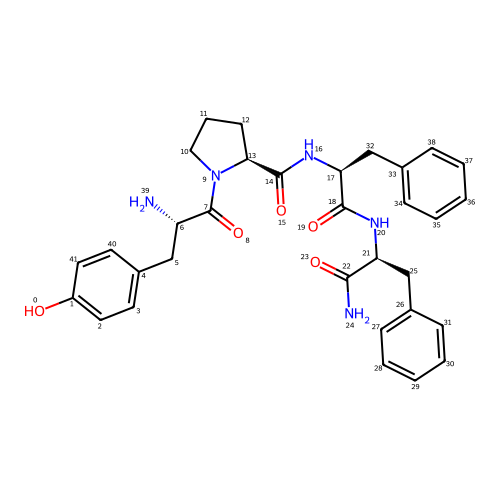

In [11]:
from rdkit import Chem
from rdkit.Chem import Draw
from io import BytesIO
from PIL import Image

smi = '[H]Oc1c([H])c([H])c(C([H])([H])[C@@]([H])(C(=O)N2C([H])([H])C([H])([H])C([H])([H])[C@@]2([H])C(=O)N([H])[C@]([H])(C(=O)N([H])[C@]([H])(C(=O)N([H])[H])C([H])([H])c2c([H])c([H])c([H])c([H])c2[H])C([H])([H])c2c([H])c([H])c([H])c([H])c2[H])N([H])[H])c([H])c1[H]'
# draw mol with atom idxs
m = Chem.MolFromSmiles(smi)
Draw.MolToImage(m, addAtomIndices=True)
d2d = Draw.MolDraw2DCairo(500,500)
dopts = d2d.drawOptions()
dopts.addAtomIndices = True
d2d.DrawMolecule(m)
d2d.FinishDrawing()
bio = BytesIO(d2d.GetDrawingText())
Image.open(bio)
# (23, 22, 21, 19)

NC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](Cc1ccccc1)NC(=O)[C@@H]1CCCN1C(=O)[C@@H](N)Cc1ccc(O)cc1


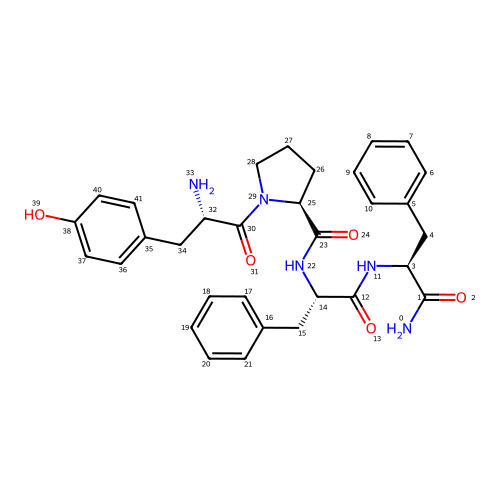

In [13]:
from rdkit import Chem
from rdkit.Chem import Draw

smi = '[H]Oc1c([H])c([H])c(C([H])([H])[C@@]([H])(C(=O)N2C([H])([H])C([H])([H])C([H])([H])[C@@]2([H])C(=O)N([H])[C@]([H])(C(=O)N([H])[C@]([H])(C(=O)N([H])[H])C([H])([H])c2c([H])c([H])c([H])c([H])c2[H])C([H])([H])c2c([H])c([H])c([H])c([H])c2[H])N([H])[H])c([H])c1[H]'
from io import BytesIO
from PIL import Image
# draw mol with atom idxs
m = Chem.MolFromSmiles(smi)
m = Chem.RemoveAllHs(m)
smi2 = Chem.MolToSmiles(m)
print(smi2)

params = Chem.SmilesParserParams()
params.removeHs = False
m = Chem.MolFromSmiles(smi2, params)
Draw.MolToImage(m, addAtomIndices=True)
d2d = Draw.MolDraw2DCairo(500,500)
dopts = d2d.drawOptions()
dopts.addAtomIndices = True
d2d.DrawMolecule(m)
d2d.FinishDrawing()
bio = BytesIO(d2d.GetDrawingText())
Image.open(bio)
# (23, 22, 21, 19)

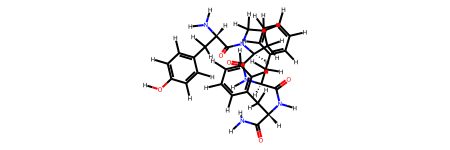

In [9]:
from rdkit import Chem
from rdkit.Chem import AllChem
from mol_to_pyg_data_obj import get_torsions

smi = '[H]Oc1c([H])c([H])c(C([H])([H])[C@@]([H])(C(=O)N2C([H])([H])C([H])([H])C([H])([H])[C@@]2([H])C(=O)N([H])[C@]([H])(C(=O)N([H])[C@]([H])(C(=O)N([H])[H])C([H])([H])c2c([H])c([H])c([H])c([H])c2[H])C([H])([H])c2c([H])c([H])c([H])c([H])c2[H])N([H])[H])c([H])c1[H]'
params = Chem.SmilesParserParams()
params.removeHs = False
m = Chem.MolFromSmiles(smi, params)
m